# Linear Regression

In [30]:
import numpy as np


In [31]:
## Linear regression implemented manually using numpy

# f = w * x

# f = 2 * x

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0


# model prediction
def forward(x):
    return w * x


# Loss = MSE
def loss(y, y_predicted):
    return ((y - y_predicted)**2).mean()


# gradients dLoss/dW
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()


print(f'prediction before taining: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 30

for epoch in range(n_iters):
    # prediction : Forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    dw = gradient(X, Y, y_pred)

    # update weights
    w = w - learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'prediction after taining: f(5) = {forward(5):.3f}')


prediction before taining: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 21: w = 2.000, loss = 0.00000000
epoch 23: w = 2.000, loss = 0.00000000
epoch 25: w = 2.000, loss = 0.00000000
epoch 27: w = 2.000, loss = 0.00000000
epoch 29: w = 2.000, loss = 0.00000000
prediction after taining: f(5) = 10.000


In [32]:
import torch

In [33]:
# Linear regression implemented using torch & autograd

# f = w * x

# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


# model prediction
def forward(x):
    return w * x


# Loss = MSE
def loss(y, y_predicted):
    return ((y - y_predicted)**2).mean()


print(f'prediction before taining: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction : Forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    l.backward() # dl/dw (this is not numerically exactly same)

    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad 

    # Reset the gradients
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'prediction after taining: f(5) = {forward(5):.3f}')


prediction before taining: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
prediction after taining: f(5) = 10.000


### Steps to implement ML models in PyTorch in general:
- Design model : input, output, forward pass
- Construct loss
- Training loop
    - Forward pass : compute prediction
    - backward pass : gradients
    - update weights

In [38]:
# Linear regression implemented using torch & autograd & inbuilt functions

import torch.nn as nn

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
X = X.view(-1, 1)
Y = Y.view(-1, 1)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

class LinearRegression1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression1, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)
    

# model prediction
# model = nn.Linear(input_size, output_size)
model = LinearRegression1(input_size, output_size)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()  # Loss = MSE
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction : Forward pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    l.backward()  # dl/dw (this is not numerically exactly same)

    # update weights
    optimizer.step()

    # Reset the gradients
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')


prediction before training: f(5) = -0.065
epoch 1: w = 0.403, loss = 32.55620193
epoch 11: w = 1.711, loss = 0.84445941
epoch 21: w = 1.922, loss = 0.02387533
epoch 31: w = 1.957, loss = 0.00252692
epoch 41: w = 1.963, loss = 0.00186348
epoch 51: w = 1.965, loss = 0.00174166
epoch 61: w = 1.966, loss = 0.00163993
epoch 71: w = 1.967, loss = 0.00154447
epoch 81: w = 1.968, loss = 0.00145458
epoch 91: w = 1.969, loss = 0.00136991
prediction after training: f(5) = 9.938


100 1
epoch 10: loss = 4305.6738
epoch 20: loss = 3215.3359
epoch 30: loss = 2426.0132
epoch 40: loss = 1854.0149
epoch 50: loss = 1439.1101
epoch 60: loss = 1137.8896
epoch 70: loss = 919.0262
epoch 80: loss = 759.8839
epoch 90: loss = 644.0869
epoch 100: loss = 559.7763


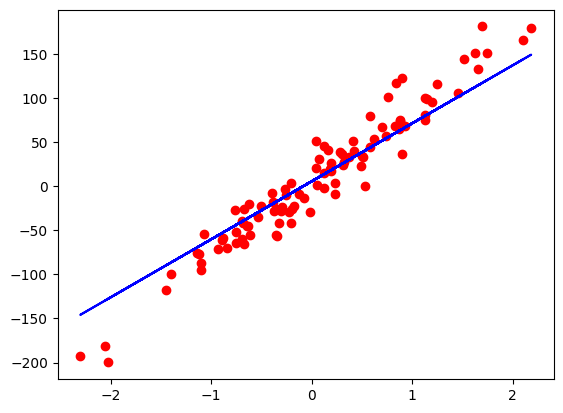

In [46]:
# Linear regression : summarize with a sample data

from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
X = X.view(-1, 1)
y = y.view(-1, 1)
n_samples, n_features = X.shape

# 1) Model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epoch = 100

for epoch in range(num_epoch):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: loss = {loss.item():.4f}')


# 4) Results
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
